In [2]:
import pandas as pd

Importar datos (Modificar según país)

In [4]:
df_merge = pd.read_csv('../Data/escuelas_semanas_visitas_sin_imputar.csv')

C:\Users\catta\Anaconda3\envs\geopython\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_merge = df_merge[df_merge['laboral']==1]

In [7]:
df_merge.head(2)

,row_number,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,...,n_visitantes_17,n_visitantes_18,n_visitantes_19,n_visitantes_20,n_visitantes_21,n_visitantes_22,n_visitantes_23,_merge,semana,laboral
0,0,2019,1,9,LICEO POLITECNICO ARICA,,69010100,1,15,AYP,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,both,20,1
1,0,2019,1,9,LICEO POLITECNICO ARICA,,69010100,1,15,AYP,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,both,16,1


Identificar que establecimientos tienen completitud en los datos

In [8]:
n_semana_por_establecimiento = df_merge.groupby(['COD_ESCUELA_PAIS', 'COD_ADM3']).semana.nunique().reset_index()

In [9]:
n_semana_por_establecimiento[n_semana_por_establecimiento['semana']==16].shape

(7855, 3)

In [12]:
n_semana_por_establecimiento[n_semana_por_establecimiento['semana']==16]['COD_ADM3'].nunique()

308

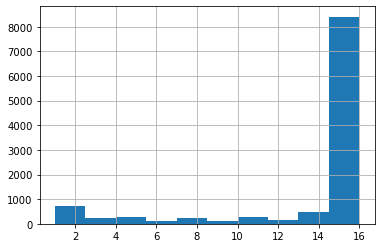

In [13]:
n_semana_por_establecimiento.semana.hist()

Revisar si hay comunas que se pierden porque los establecimientos de esas comunas no tienen datos

In [14]:
df_merge_left_only = pd.read_csv('data/ee_sin_registros.csv')

In [15]:
set(df_merge_left_only['NOM_ADM3'].unique())-set(df_merge['NOM_ADM3'].unique())

{'ANTÁRTICA', "O'HIGGINS", 'TIMAUKEL'}

Revisar completitud de info en comunas

In [18]:
df_grouped = df_merge.groupby(['COD_ADM1','COD_ADM3','NOM_ADM3','semana']).agg({'geohash':'nunique',
                                                   'n_visitantes_geohash':'sum',
                                                   'n_visitantes_adm3':'sum',
                                                   'n_visitantes_0':'sum',
                                                   'n_visitantes_1':'sum',
                                                   'n_visitantes_2':'sum',
                                                   'n_visitantes_3':'sum',
                                                   'n_visitantes_4':'sum',
                                                   'n_visitantes_5':'sum',
                                                   'n_visitantes_6':'sum',
                                                   'n_visitantes_7':'sum',
                                                   'n_visitantes_8':'sum',
                                                   'n_visitantes_9':'sum',
                                                   'n_visitantes_10':'sum',
                                                   'n_visitantes_11':'sum',
                                                   'n_visitantes_12':'sum',
                                                   'n_visitantes_13':'sum',
                                                   'n_visitantes_14':'sum',
                                                   'n_visitantes_15':'sum',
                                                   'n_visitantes_16':'sum',
                                                   'n_visitantes_17':'sum',
                                                   'n_visitantes_18':'sum',
                                                   'n_visitantes_19':'sum',
                                                   'n_visitantes_20':'sum',
                                                   'n_visitantes_21':'sum',
                                                   'n_visitantes_22':'sum',
                                                   'n_visitantes_23':'sum',        
                                                  }).reset_index()

In [19]:
n_semana_por_comuna = df_grouped.groupby('NOM_ADM3').semana.count().reset_index()

In [20]:
n_semana_por_comuna.head()

,NOM_COM_RBD,semana
0,ALGARROBO,16
1,ALHUÉ,16
2,ALTO BIOBÍO,16
3,ALTO DEL CARMEN,16
4,ALTO HOSPICIO,16


¿Cuántas comunas no tienen info las 16 semanas?

In [21]:
len(list(set(df_grouped['NOM_ADM3'].unique()) - set(n_semana_por_comuna[n_semana_por_comuna.semana==16]['NOM_ADM3'].unique())))

27

In [22]:
for x in list(set(df_grouped['NOM_ADM3'].unique()) - set(n_semana_por_comuna[n_semana_por_comuna.semana==16]['NOM_ADM3'].unique())):
    print(x)

GENERAL LAGOS
SAN FABIÁN
ANTUCO
GUAITECAS
PRIMAVERA
RÍO CLARO
PALENA
VICHUQUEN
SAN PEDRO
PERQUENCO
LOS SAUCES
FUTALEUFÚ
RÍO IBÁÑEZ
LAGO VERDE
SAN GREGORIO
COLCHANE
EMPEDRADO
COCHAMÓ
OLLAGÜE
PUQUELDÓN
TORTEL
LAGUNA BLANCA
JUAN FERNÁNDEZ
SAAVEDRA
TORRES DEL PAINE
RÍO VERDE
CURACO DE VÉLEZ
